<a href="https://colab.research.google.com/github/Karlobyo/leukemic_cell_detective/blob/main/Leukemic_cell_detective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset from kaggle
https://www.kaggle.com/datasets/andrewmvd/leukemia-classification

Original dataset
https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=52758223

Gupta, A., & Gupta, R. (2019). ALL Challenge dataset of ISBI 2019 [Data set]. The Cancer Imaging Archive. https://doi.org/10.7937/tcia.2019.dc64i46r

In [10]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
import numpy as np 
import pandas as pd 
import os
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Put Colab in the context of this challenge
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Leukemic_Cell_Detective/')

In [13]:
!pwd

/content/drive/MyDrive/Leukemic_Cell_Detective


In [14]:
!ls

C-NMC_Leukemia	Leukemic_cell_detective.ipynb  leukemic_cells_data.zip


In [15]:
#!unzip leukemic_cells_data.zip


In [16]:
all_0 = "/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/training_data/fold_0/all"
all_1 = "/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/training_data/fold_1/all"
all_2 = "/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/training_data/fold_2/all"

hem_0 = "/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/training_data/fold_0/hem"
hem_1 = "/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/training_data/fold_1/hem"
hem_2 = "/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/training_data/fold_2/hem"

In [17]:
print(len(all_0))


86


In [18]:
def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder) 
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)
    
    return image_paths

In [19]:
# load training data

img_data_train = []

for i in [all_0,all_1,all_2,hem_0,hem_1,hem_2]:
    paths = get_path_image(i)
    img_data_train.extend(paths)
print(len(img_data_train))

10661


In [20]:
data_train = {"img_data":img_data_train,
        "labels":[np.nan for x in range(len(img_data_train))]}

data_train_df = pd.DataFrame(data_train) 
data_train_df

,img_data,labels
0,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
1,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
2,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
3,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
4,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
...,...,...
10656,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
10657,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
10658,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN
10659,/content/drive/MyDrive/Leukemic_Cell_Detective...,NaN


In [21]:
data_train_df["labels"][0:7272] = 1 # ALL
data_train_df["labels"][7272:] = 0 # HEM

<ipython-input-21-0649835c6be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_df["labels"][0:7272] = 1 # ALL
<ipython-input-21-0649835c6be5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_df["labels"][7272:] = 0 # HEM


In [22]:
data_train_df.iloc[7250:7290,:]

,img_data,labels
7250,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7251,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7252,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7253,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7254,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7255,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7256,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7257,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7258,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0
7259,/content/drive/MyDrive/Leukemic_Cell_Detective...,1.0


In [23]:
data_train_df['labels'].value_counts()

1.0    7272
0.0    3389
Name: labels, dtype: int64

In [24]:
test_data_path = '/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/testing_data/C-NMC_test_prelim_phase_data'
test_data_labels = '/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/testing_data/C-NMC_test_prelim_phase_data_labels.csv'

In [25]:
#from tensorflow.keras.utils import image_dataset_from_directory


In [26]:
#hem_aug = image_dataset_from_directory()

In [27]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_data_train():
    for j in range(1, 2, 3):
      data_path = f"/content/drive/MyDrive/Leukemic_Cell_Detective/C-NMC_Leukemia/training_data/fold_{j}/"
      classes = {'hem':0, 'all':1}
      imgs = []
      labels = []
      for (cl, i) in classes.items():
          images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.bmp')>0]
          for img in tqdm(images_path[:4600]):
              path = os.path.join(data_path, cl, img)
              if os.path.exists(path):
                  image = Image.open(path)
                  imgs.append(np.array(image))
                  labels.append(i)

      X = np.array(imgs)
      num_classes = len(set(labels))
      y = to_categorical(labels, num_classes)

      # Finally we shuffle:
      p = np.random.permutation(len(X))
      X_train, y_train = X[p], y[p]
    
    return X_train, y_train, num_classes

In [28]:
def load_data_test():
  
      data_path = test_data_path
      imgs = []
      test_img_data_labels_df = pd.read_csv(test_data_labels)
      labels = list(test_img_data_labels_df['labels'])
      
      imgs_paths = []
      paths = get_path_image(test_data_path)
      imgs_paths.extend(paths)     
      for i in imgs_paths:
        image = Image.open(i)
        imgs.append(np.array(image))

      X_test = np.array(imgs)
      num_classes = len(set(labels))
      y_test = to_categorical(labels, num_classes)
    
      return X_test, y_test, num_classes

In [29]:
X_train, y_train, num_classes = load_data_train()


100%|██████████| 2418/2418 [00:38<00:00, 62.41it/s] 


In [30]:
X_test, y_test, num_classes = load_data_test()


In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3581, 450, 450, 3)
(3581, 2)
(1867, 450, 450, 3)
(1867, 2)


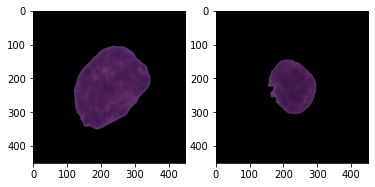

In [32]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[9]);
plt.subplot(1, 2, 2)
plt.imshow(X_test[11]);


In [33]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import models, layers

In [1]:
def load_own_model():

  model = models.Sequential()

  model.add(Rescaling(1./450, input_shape=(450,450,3)))

  model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2)))

  model.add(layers.Conv2D(16, (2, 2), activation='relu', padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())

  model.add(layers.Dense(10))

  model.add(layers.Dense(2, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
base_model = load_own_model()

In [42]:
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 450, 450, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 450, 450, 8)       608       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 225, 225, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 225, 225, 16)      2064      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 16)     

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
es_base = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 10, 
                   verbose = 1, 
                   restore_best_weights = True)

In [ ]:
base_history = base_model.fit(X_train, y_train, validation_split=0.2, batch_size=128, callbacks=[es_base], epochs=100)

Epoch 1/100


In [ ]:
base_model.evaluate(X_test, y_test)

In [ ]:
score = base_model.evaluate(X_test, y_test)[1]

In [ ]:
print(f"The accuracy of a baseline model is: {score}")

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    
    return model

In [ ]:
model_VGG16 = load_model()

In [ ]:
model_VGG16.summary()

In [ ]:
def set_nontrainable_layers(model):
    
    model.trainable=False
    
    return model

In [ ]:
model_VGG16 = set_nontrainable_layers(model_VGG16)

In [ ]:
model_VGG16.summary()

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    
    base_model = load_model()

    base_model = set_nontrainable_layers(base_model)

    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(2, activation='softmax')

    model = models.Sequential([
        base_model,
        flattening_layer,
        dense_layer,
        prediction_layer
        ])


    return model

In [ ]:
model_VGG16_complete = add_last_layers(model_VGG16)

In [ ]:
model_VGG16_complete.summary()

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    
    model = model_VGG16_complete

    opt = optimizers.Adam(learning_rate=1e-4)

    model.compile(loss='binary_crossentropy', optimizer= opt, metrics='accuracy')

    return model

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [ ]:
model_ready = build_model()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=20)

In [ ]:
history = model_ready.fit(X_train, y_train, validation_data=(X_val, y_val),
                          callbacks=[es], batch_size=64, epochs=100)

In [ ]:
y_train.shape

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
import matplotlib.pyplot as plot
plot_history(history)

In [ ]:
score = model_ready.evaluate(X_test, y_test)[1]

In [ ]:
print(f"The model accuracy on the test data is: {score}")